In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Dataset basic statistics

In [46]:
songs_df = pd.read_csv(os.path.join("data", "merged_songs_v1.csv"))
artists_df = pd.read_csv(os.path.join("data", "artists_v1.csv"))

songs_df.columns, artists_df.columns

(Index(['title', 'artist', 'title_listeners', 'title_scrobbles', 'title_tags',
        'genre_tags', 'title_duration', 'audio_path', 'yt_title', 'yt_url',
        'yt_duration', 'yt_views'],
       dtype='object'),
 Index(['artist', 'artist_listeners', 'artist_scrobbles', 'artist_tags'], dtype='object'))

As the ```artists_v1.csv``` file contains information about all fetched artists, we should filter only those who were left after preprocessing step (i.e., are present in ```songs_v1.csv```):

In [47]:
print("Number of artists before filtering: ", len(artists_df))
artists_df = artists_df[artists_df["artist"].isin(songs_df["artist"])]
print("Number of artists after filtering: ", len(artists_df))
assert len(artists_df) == len(songs_df["artist"].unique())

Number of artists before filtering:  205
Number of artists after filtering:  60


## Songs per artist

In [51]:
songs_per_artist = songs_df["artist"].value_counts()

print(f"Total number of songs: {len(songs_df)}\n")
print(f"Number of songs per artist:\n{songs_per_artist.describe()}")

Total number of songs: 3166

Number of songs per artist:
count    60.000000
mean     52.766667
std      19.916237
min      16.000000
25%      37.000000
50%      53.500000
75%      66.250000
max      94.000000
Name: artist, dtype: float64


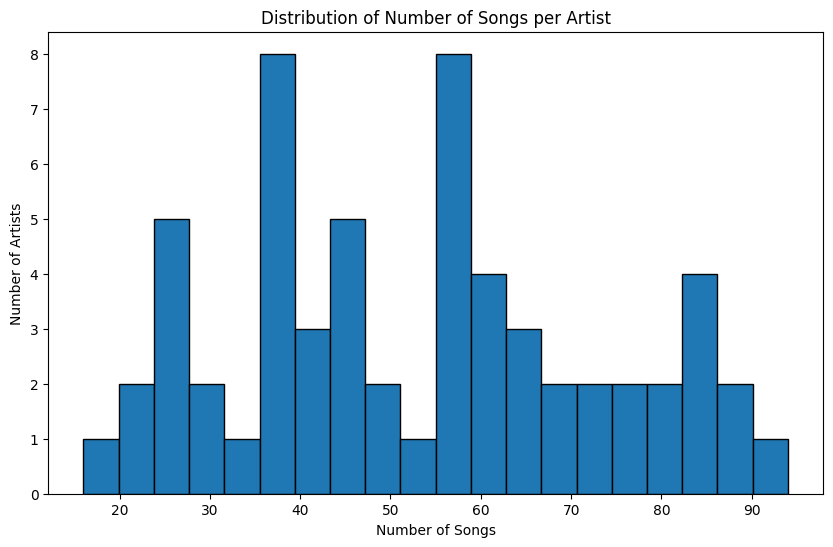

In [52]:
# plot number of songs per artists in bins
plt.figure(figsize=(10, 6))
plt.hist(songs_per_artist.values, bins=20, edgecolor='black')
plt.title("Distribution of Number of Songs per Artist")
plt.xlabel("Number of Songs")
plt.ylabel("Number of Artists")
plt.show()


In [71]:
print("10 artists with the biggest number of songs:")
songs_per_artist.head(10)

10 artists with the biggest number of songs:


Скрябін              94
Океан Ельзи          87
O.Torvald            87
Воплі Відоплясова    85
Тартак               85
Марія Бурмака        84
Artem Pivovarov      83
Антитіла             80
Арсен Мірзоян        79
Мертвий Півень       77
Name: artist, dtype: int64

## Popularity

### Artists

In [53]:
artists_df["artist_scrobbles"].describe()

count    6.000000e+01
mean     8.739923e+05
std      1.970353e+06
min      5.978800e+04
25%      1.319158e+05
50%      2.442805e+05
75%      8.040772e+05
max      1.355290e+07
Name: artist_scrobbles, dtype: float64

In [65]:
print("10 most popular artists (based on current listeners):")
artists_df.sort_values("artist_listeners", ascending=False).head(10)

10 most popular artists (based on current listeners):


,artist,artist_listeners,artist_scrobbles,artist_tags
0,Океан Ельзи,203060.0,13552898.0,"['rock', 'ukrainian', 'ukrainian rock', 'indie..."
1,Go_A,189946.0,4088960.0,"['ukrainian', 'folktronica', 'folk', 'electron..."
2,Бумбокс,174374.0,6424069.0,"['ukrainian', 'funk', 'reggae', 'hip-hop', 'fu..."
4,KALUSH,106178.0,1850491.0,"['ukrainian', 'rap', 'hip-hop', 'ukraine', 'eu..."
7,alyona alyona,91289.0,1677579.0,"['ukrainian', 'rap', 'hip-hop', 'hip hop', 'tr..."
14,Lama,70056.0,1537189.0,"['punk', 'ukrainian', 'hardcore punk', 'finnis..."
3,Скрябін,59090.0,2821158.0,"['ukrainian', 'synthpop', 'pop-rock', 'electro..."
13,Kazka,58150.0,1103443.0,"['ukrainian', 'pop', 'ukraine', 'indie pop', '..."
24,TVORCHI,56405.0,627532.0,"['pop', 'ukrainian', 'electronic', 'dance', 'u..."
6,The Hardkiss,53408.0,2134936.0,"['ukrainian', 'electronic', 'dance', 'alternat..."


In [66]:
print("10 least popular artists (based on current listeners):")
artists_df.sort_values("artist_listeners", ascending=True).head(10)

10 least popular artists (based on current listeners):


,artist,artist_listeners,artist_scrobbles,artist_tags
130,Лінія Маннергейма,3457.0,108899.0,"['electronic', 'experimental', 'trip-hop', 'uk..."
117,Ницо Потворно,3871.0,126221.0,"['ukrainian', 'hip hop', 'rap', 'electronic', ..."
186,Орест Лютий,4492.0,82936.0,"['ukrainian', 'comedy', 'parody', 'neofolk']"
154,Скажи щось погане,4715.0,82593.0,"['psychedelic rock', 'ukrainian', 'indie pop',..."
197,Катя Chilly,4952.0,119507.0,"['ukrainian', 'ethnic', 'electronic', 'female ..."
105,Жадан і собаки,5128.0,155657.0,"['ukrainian', 'punk rock', 'ska punk', 'rock']"
156,Без Обмежень,5315.0,95218.0,"['ukrainian', 'rock', 'rap', 'ukrainian rap']"
196,Марія Бурмака,5417.0,106046.0,"['ukrainian', 'female vocalists', 'ukraine', '..."
157,Ігор Кайдаш,5618.0,79910.0,"['indie pop', 'indie rock', 'ukrainian', 'lo-f..."
75,dity inzheneriv,5724.0,218071.0,"['post-punk', 'ukrainian', 'alternative rock',..."


In [54]:
artists_df["artist_listeners"].describe()

count        60.000000
mean      28799.450000
std       42927.621051
min        3457.000000
25%        6938.000000
50%       11885.500000
75%       31108.750000
max      203060.000000
Name: artist_listeners, dtype: float64

In [74]:
print("10 most popular artists (based on total scrobbles):")
artists_df.sort_values("artist_scrobbles", ascending=False).head(10)

10 most popular artists (based on total scrobbles):


,artist,artist_listeners,artist_scrobbles,artist_tags
0,Океан Ельзи,203060.0,13552898.0,"['rock', 'ukrainian', 'ukrainian rock', 'indie..."
2,Бумбокс,174374.0,6424069.0,"['ukrainian', 'funk', 'reggae', 'hip-hop', 'fu..."
1,Go_A,189946.0,4088960.0,"['ukrainian', 'folktronica', 'folk', 'electron..."
3,Скрябін,59090.0,2821158.0,"['ukrainian', 'synthpop', 'pop-rock', 'electro..."
6,The Hardkiss,53408.0,2134936.0,"['ukrainian', 'electronic', 'dance', 'alternat..."
4,KALUSH,106178.0,1850491.0,"['ukrainian', 'rap', 'hip-hop', 'ukraine', 'eu..."
7,alyona alyona,91289.0,1677579.0,"['ukrainian', 'rap', 'hip-hop', 'hip hop', 'tr..."
14,Lama,70056.0,1537189.0,"['punk', 'ukrainian', 'hardcore punk', 'finnis..."
21,Тартак,35856.0,1233300.0,"['ukrainian', 'rapcore', 'alternative', 'hip-h..."
16,Один В Каное,30398.0,1146448.0,"['ukrainian', 'indie', 'folk', 'female vocal',..."


In [73]:
print("10 least popular artists (based on total scrobbles):")
artists_df.sort_values("artist_scrobbles", ascending=True).head(10)

10 least popular artists (based on total scrobbles):


,artist,artist_listeners,artist_scrobbles,artist_tags
199,To Eternity,6176.0,59788.0,"['ukrainian', 'pop', 'indie pop', 'ukranian', ..."
157,Ігор Кайдаш,5618.0,79910.0,"['indie pop', 'indie rock', 'ukrainian', 'lo-f..."
154,Скажи щось погане,4715.0,82593.0,"['psychedelic rock', 'ukrainian', 'indie pop',..."
186,Орест Лютий,4492.0,82936.0,"['ukrainian', 'comedy', 'parody', 'neofolk']"
147,Маша Кондратенко,7218.0,89113.0,"['ukrainian', 'pop', 'electropop', 'booba', 'u..."
173,Тарас Чубай,7718.0,91736.0,"['ukrainian', 'ukraine', 'rock', 'ukrainian ro..."
194,Нумер 482,6963.0,94210.0,"['ukrainian', 'rock', 'alternative', 'ukrainia..."
152,Гурт [О],6723.0,95211.0,"['ukrainian', 'pop', 'electropop', 'indie pop'..."
156,Без Обмежень,5315.0,95218.0,"['ukrainian', 'rock', 'rap', 'ukrainian rap']"
196,Марія Бурмака,5417.0,106046.0,"['ukrainian', 'female vocalists', 'ukraine', '..."


### Songs

In [57]:
songs_df["title_listeners"].describe()

count      3165.000000
mean       1827.654028
std        5119.443019
min           1.000000
25%         192.000000
50%         593.000000
75%        1568.000000
max      163046.000000
Name: title_listeners, dtype: float64

In [78]:
columns = ["title", "artist", "title_listeners", "title_scrobbles",	"title_tags"]

print("10 most popular songs (based on current listeners):")
songs_df.sort_values("title_listeners", ascending=False).head(10)[columns]

10 most popular songs (based on current listeners):


,title,artist,title_listeners,title_scrobbles,title_tags
43,SHUM,Go_A,163046.0,2108741.0,"['folk', 'folktronica']"
0,Без бою,Океан Ельзи,67241.0,500416.0,"['alternative rock', 'pop rock', 'rock', 'ukra..."
155,Teresa & Maria,alyona alyona,64190.0,960536.0,"['hip hop', 'hip-hop', 'pop', 'rap']"
1363,Вахтёрам,Бумбокс,50701.0,393405.0,"['funk', 'reggae']"
1,Обійми,Океан Ельзи,40990.0,282632.0,"['alternative rock', 'blues', 'rock', 'ukraini..."
2,Не питай,Океан Ельзи,39876.0,303396.0,"['rock', 'ukrainian rock']"
44,Solovey,Go_A,39876.0,390694.0,"['folk', 'folktronica']"
72,Та4то,Бумбокс,39346.0,313514.0,"['funk', 'hip-hop', 'pop', 'reggae']"
45,Шум,Go_A,39101.0,351027.0,"['ebm', 'electronic', 'folk', 'folktronica']"
3,Коли тебе нема,Океан Ельзи,37672.0,239250.0,"['rock', 'ukrainian rock']"


In [80]:
print("10 least popular songs (based on current listeners):")
songs_df.sort_values("title_listeners", ascending=True).head(10)[columns]

10 least popular songs (based on current listeners):


,title,artist,title_listeners,title_scrobbles,title_tags
2096,Полетаем,Маша Кондратенко,1.0,27.0,"['electropop', 'pop', 'ukrainian pop']"
2682,Pitch,To Eternity,1.0,2.0,"['indie pop', 'pop']"
1990,1,Лінія Маннергейма,1.0,1.0,"['electronic', 'experimental', 'trip-hop']"
1989,Ніби І Не Знав,Лінія Маннергейма,1.0,1.0,"['electronic', 'experimental', 'trip-hop']"
2176,Хто я?,Гурт [О],1.0,3.0,"['electropop', 'indie pop', 'pop']"
1988,Мені 42,Лінія Маннергейма,1.0,1.0,"['electronic', 'experimental', 'trip-hop']"
1987,Live at On-Air,Лінія Маннергейма,1.0,1.0,"['electronic', 'experimental', 'trip-hop']"
1520,220+Цятка+Полька,Перкалаба,1.0,1.0,"['ethno-ska', 'folk', 'folk-punk', 'ska']"
2315,спи собі сама,Ігор Кайдаш,1.0,1.0,"['indie pop', 'indie rock', 'lo-fi']"
754,Black Costume,The Unsleeping,1.0,6.0,"['alternative rock', 'grunge', 'post-rock']"


In [84]:
songs_df["title_scrobbles"].describe()

count    3.165000e+03
mean     1.152386e+04
std      4.982594e+04
min      1.000000e+00
25%      7.580000e+02
50%      2.804000e+03
75%      8.439000e+03
max      2.108741e+06
Name: title_scrobbles, dtype: float64

In [81]:
print("10 most popular songs (based on total scrobbles):")
songs_df.sort_values("title_scrobbles", ascending=False).head(10)[columns]

10 most popular songs (based on total scrobbles):


,title,artist,title_listeners,title_scrobbles,title_tags
43,SHUM,Go_A,163046.0,2108741.0,"['folk', 'folktronica']"
155,Teresa & Maria,alyona alyona,64190.0,960536.0,"['hip hop', 'hip-hop', 'pop', 'rap']"
0,Без бою,Океан Ельзи,67241.0,500416.0,"['alternative rock', 'pop rock', 'rock', 'ukra..."
1363,Вахтёрам,Бумбокс,50701.0,393405.0,"['funk', 'reggae']"
44,Solovey,Go_A,39876.0,390694.0,"['folk', 'folktronica']"
45,Шум,Go_A,39101.0,351027.0,"['ebm', 'electronic', 'folk', 'folktronica']"
72,Та4то,Бумбокс,39346.0,313514.0,"['funk', 'hip-hop', 'pop', 'reggae']"
2,Не питай,Океан Ельзи,39876.0,303396.0,"['rock', 'ukrainian rock']"
1,Обійми,Океан Ельзи,40990.0,282632.0,"['alternative rock', 'blues', 'rock', 'ukraini..."
2773,Плакала,Kazka,29583.0,262664.0,['pop']


In [82]:
print("10 least popular songs (based on total scrobbles):")
songs_df.sort_values("title_scrobbles", ascending=True).head(10)[columns]

10 least popular songs (based on total scrobbles):


,title,artist,title_listeners,title_scrobbles,title_tags
2315,спи собі сама,Ігор Кайдаш,1.0,1.0,"['indie pop', 'indie rock', 'lo-fi']"
2097,знайшла свій щоденник,Маша Кондратенко,1.0,1.0,"['electropop', 'pop', 'ukrainian pop']"
1136,Navushnyky,dity inzheneriv,1.0,1.0,"['alternative', 'alternative rock', 'indie roc..."
1329,А ти спитала мені як?,Sad Novelist,1.0,1.0,"['indie pop', 'indie rock', 'post-punk']"
2098,Ванька-Встанька ● караоке,Маша Кондратенко,1.0,1.0,"['electropop', 'pop', 'ukrainian pop']"
2688,Rich Love - Original Song,To Eternity,1.0,1.0,"['indie pop', 'pop']"
1520,220+Цятка+Полька,Перкалаба,1.0,1.0,"['ethno-ska', 'folk', 'folk-punk', 'ska']"
1939,Дамоклів меч,renie cares,1.0,1.0,"['electropop', 'indie pop', 'indie rock']"
1362,Додому,Sad Novelist,1.0,1.0,"['indie pop', 'indie rock', 'post-punk']"
2690,Electric Universe - Meteor,To Eternity,1.0,1.0,"['indie pop', 'pop']"


## Genre tags

### Artist level

In [97]:
artists_df["artist_tags"] = artists_df["artist_tags"].apply(eval)

print("Number of unique tags: ", len(artists_df["artist_tags"].explode().unique()))

Number of unique tags:  126


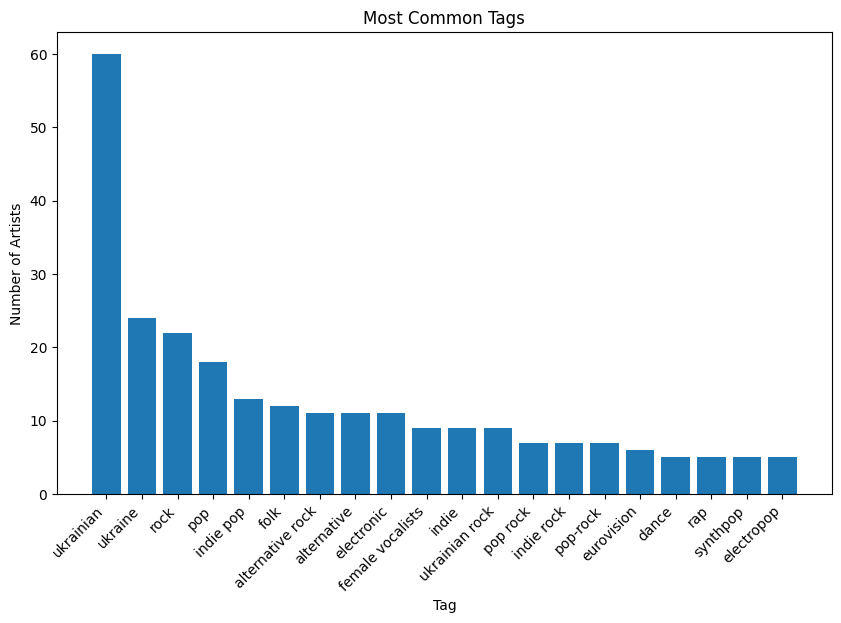

In [ ]:
tags_count = artists_df["artist_tags"].explode().value_counts()

plt.figure(figsize=(10, 6))
plt.bar(tags_count.head(20).index, tags_count.head(20).values)
plt.xticks(rotation=45, ha='right')
plt.title("Most Artist Common Tags")
plt.xlabel("Tag")
plt.ylabel("Number of Artists")
plt.show()

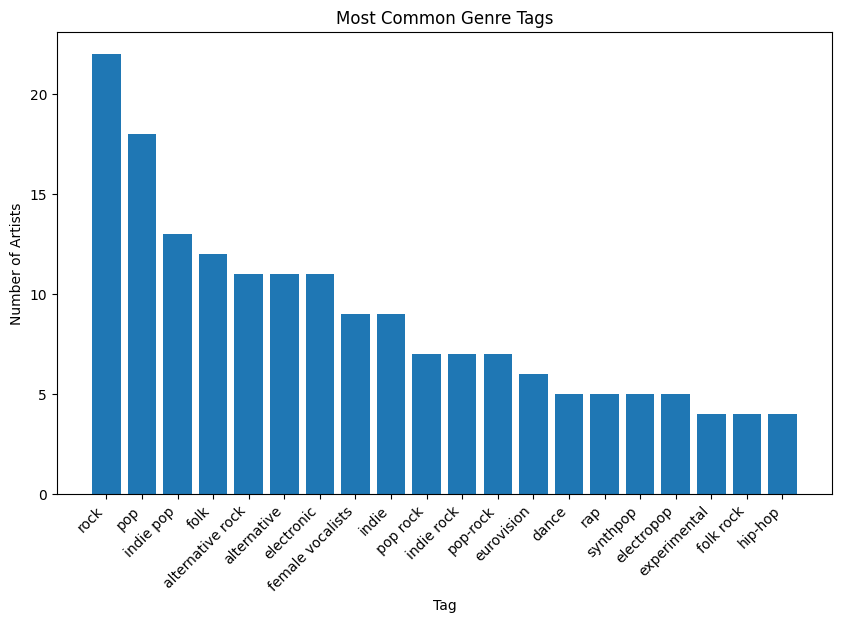

In [ ]:
genre_tags_count = tags_count[~tags_count.index.str.contains("ukr", case=False)]

plt.figure(figsize=(10, 6))
plt.bar(genre_tags_count.head(20).index, genre_tags_count.head(20).values)
plt.xticks(rotation=45, ha='right')
plt.title("Most Common Artist Genre Tags")
plt.xlabel("Tag")
plt.ylabel("Number of Artists")
plt.show()

### Song level

In [ ]:
songs_df["title_tags"] = songs_df["title_tags"].apply(eval)
songs_df["genre_tags"] = songs_df["genre_tags"].apply(eval)

print("Number of unique tags in songs: ", len(songs_df["title_tags"].explode().unique()))
print("Number of unique genre tags in songs: ", len(songs_df["genre_tags"].explode().unique()))

Number of unique tags in songs:  140
Number of unique genre tags in songs:  25


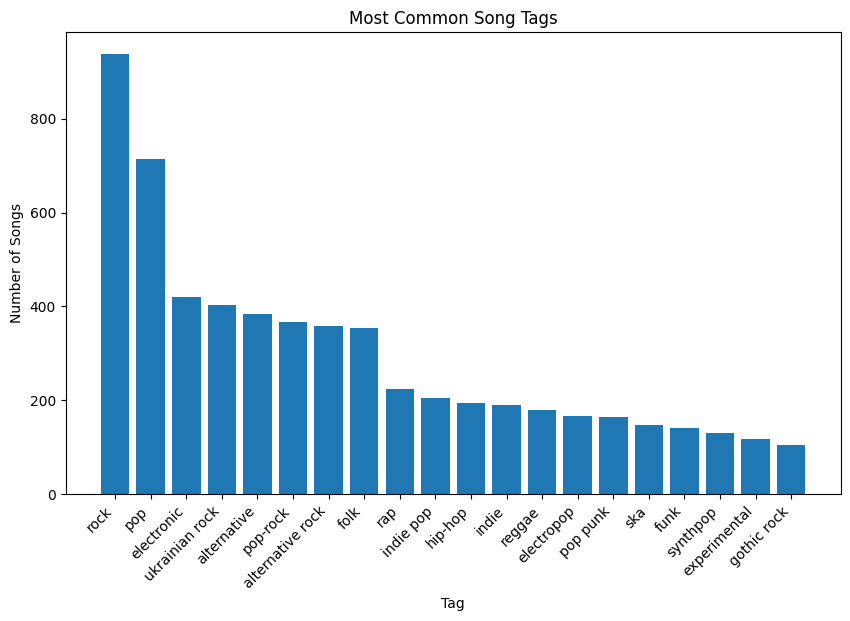

In [102]:
tags_count = songs_df["title_tags"].explode().value_counts()

plt.figure(figsize=(10, 6))
plt.bar(tags_count.head(20).index, tags_count.head(20).values)
plt.xticks(rotation=45, ha='right')
plt.title("Most Common Song Tags")
plt.xlabel("Tag")
plt.ylabel("Number of Songs")
plt.show()

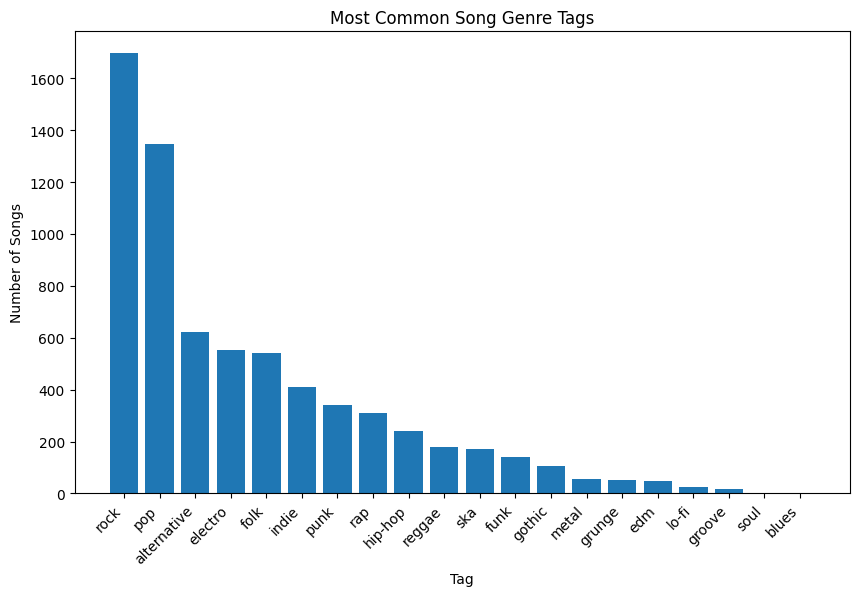

In [103]:
genre_tags_count = songs_df["genre_tags"].explode().value_counts()

plt.figure(figsize=(10, 6))
plt.bar(genre_tags_count.head(20).index, genre_tags_count.head(20).values)
plt.xticks(rotation=45, ha='right')
plt.title("Most Common Song Genre Tags")
plt.xlabel("Tag")
plt.ylabel("Number of Songs")
plt.show()

## Total audio hours

In [105]:
total_duration = songs_df["yt_duration"].sum()
print("Total duration of the collected audios (hrs):", total_duration // 3600)

songs_df["yt_duration"].describe()

Total duration of the collected audios (hrs): 207


count    3166.000000
mean      236.159191
std       250.734461
min         8.000000
25%       180.000000
50%       216.000000
75%       250.000000
max      6846.000000
Name: yt_duration, dtype: float64

In [ ]:
norm_length_songs_df = songs_df[(songs_df["yt_duration"] > 120) & (songs_df["yt_duration"] < 300)]

print("Total duration of the collected audios (hrs):", norm_length_songs_df["yt_duration"].sum() // 3600)
norm_length_songs_df["yt_duration"].describe()

Total duration of the collected audios (hrs): 159


count    2729.000000
mean      210.646757
std        41.354076
min       121.000000
25%       182.000000
50%       213.000000
75%       240.000000
max       299.000000
Name: yt_duration, dtype: float64

### Exploring extremely long/short samples

In [ ]:
songs_df[songs_df["yt_duration"] > 3600]

,title,artist,title_listeners,title_scrobbles,title_tags,genre_tags,title_duration,audio_path,yt_title,yt_url,yt_duration,yt_views
538,Шабадабада,Мертвий Півень,1218.0,4491.0,"[folk-rock, rock, ukrainian rock]","[folk, rock]",NaN,audio\Мертвий Півень - Шабадабада (1998) [Art ...,Мертвий Півень - Шабадабада (1998) [Art Rock],https://youtube.com/watch?v=iiVtWnVn8UA,3812,466
1480,говорить івано-франківськ,Перкалаба,1275.0,5416.0,"[ethno-ska, folk, folk-punk, ska]","[folk, punk, ska]",163.0,audio\Перкалаба - Говорить Івано-Франківськ (2...,Перкалаба - Говорить Івано-Франківськ (2007),https://youtube.com/watch?v=caxBaiAejcE,4169,869
1877,Ницо на шоу «Голос країни»,Ницо Потворно,1.0,2.0,"[electronic, experimental, hip hop, rap]","[electro, hip-hop, rap]",NaN,audio\Ницо Потворно: створюйте нових українців...,Ницо Потворно: створюйте нових українців | Кор...,https://youtube.com/watch?v=sR0VfA84lIQ,6846,18534
1956,Сон,Обійми Дощу,345.0,6877.0,"[depressive rock, melancholic rock, progressiv...","[metal, rock]",432.0,"audio\Обійми Дощу — Сон (2017, весь альбом).mp3","Обійми Дощу — Сон (2017, весь альбом)",https://youtube.com/watch?v=9mFxy0Aknkg,4341,34154
1987,Live at On-Air,Лінія Маннергейма,1.0,1.0,"[electronic, experimental, trip-hop]",[electro],NaN,audio\Лінія Маннергейма Live at On-Air + Інтер...,Лінія Маннергейма Live at On-Air + Інтерв'ю - ...,https://youtube.com/watch?v=n6ssN6JcnY0,3661,1919
1990,1,Лінія Маннергейма,1.0,1.0,"[electronic, experimental, trip-hop]",[electro],NaN,audio\Линия Маннергейма / Mannerheim Line (19...,Линия Маннергейма / Mannerheim Line (1940) фи...,https://youtube.com/watch?v=6J463fQQvYU,4460,30608


In [107]:
songs_df[songs_df["yt_duration"] < 60]

,title,artist,title_listeners,title_scrobbles,title_tags,genre_tags,title_duration,audio_path,yt_title,yt_url,yt_duration,yt_views
152,Привіт,The Hardkiss,1870.0,8601.0,"[alternative rock, electronic]","[alternative, electro, rock]",49.0,audio\THE HARDKISS - Привіт (official audio).mp3,THE HARDKISS - Привіт (official audio),https://youtube.com/watch?v=mxkvnRNoA-k,50,258195
292,А2,The Hardkiss,1090.0,4644.0,"[alternative, alternative rock, electronic]","[alternative, electro, rock]",38.0,audio\А2.mp3,А2,https://youtube.com/watch?v=c_Ufb74MQHE,39,65306
295,Part One Hard,The Hardkiss,454.0,2298.0,"[alternative rock, electronic]","[alternative, electro, rock]",NaN,audio\Part 1. Hard.mp3,Part 1. Hard,https://youtube.com/watch?v=iO-6a5IOM-4,39,53645
297,Part Two Kiss,The Hardkiss,420.0,2338.0,"[alternative rock, electronic]","[alternative, electro, rock]",NaN,audio\Part 2. Kiss.mp3,Part 2. Kiss,https://youtube.com/watch?v=zXwmHoq-5Bs,44,31337
413,Вчора,Vivienne Mort,1165.0,5797.0,"[alternative rock, experimental]","[alternative, rock]",52.0,"audio\Vivienne Mort — Вчора [Досвід, 2018].mp3","Vivienne Mort — Вчора [Досвід, 2018]",https://youtube.com/watch?v=mQJ8shzvdM4,52,26804
441,Christmas song,Vivienne Mort,130.0,459.0,"[alternative rock, experimental]","[alternative, rock]",NaN,audio\#@)₴?$0 Live: Vivienne Mort – «Christmas...,#@)₴?$0 Live: Vivienne Mort – «Christmas Song»,https://youtube.com/watch?v=0ZY0KwoNDcU,50,6426
754,Black Costume,The Unsleeping,1.0,6.0,"[alternative rock, grunge, post-rock]","[alternative, grunge, rock]",NaN,audio\5 Halloween costume ideas for a black dr...,5 Halloween costume ideas for a black dress! #...,https://youtube.com/watch?v=g3AwKwogY6Q,15,868648
960,Хіппі,Димна Суміш,1653.0,6876.0,"[alternative, alternative rock, grunge, post-g...","[alternative, grunge, rock]",56.0,audio\Хіппі.mp3,Хіппі,https://youtube.com/watch?v=RRTZ0IxoJeM,57,5649
979,Кiнцева,Димна Суміш,138.0,480.0,"[alternative, alternative rock, grunge, post-g...","[alternative, grunge, rock]",NaN,audio\Кiнцева.mp3,Кiнцева,https://youtube.com/watch?v=Wxbt8YJfBBc,45,11710
1218,Клітка з левом,Плач Єремії,413.0,1471.0,"[rock, ukrainian rock]",[rock],NaN,audio\Слова песни Плач Еремии - Клітка З Левом...,Слова песни Плач Еремии - Клітка З Левом,https://youtube.com/watch?v=hGpG4Vj9m5Y,48,168
